In [164]:
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
# decide the data to use
USE_SIMPLE_DATA = False



In [166]:
import matplotlib
matplotlib.rc('font',family = 'PingFang HK')

# analyze the data after clustering

1. mulinoimal regression
2. explore relationship inside the cluster

## 1. mulinoimal regression

In [167]:
# Load the data
os.chdir('/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes')
df =  pd.read_csv('/processedData/simplify_tsneCluster.csv') if USE_SIMPLE_DATA else pd.read_csv('processedData/raw_tsneCluster.csv')

In [168]:
# cleaning the data
cleaned_df = df[[ '國文檢定_code', '英文檢定_code',
               '數學檢定_code',
               '社會檢定_code', '自然檢定_code', '國文倍率', '英文倍率', '數學倍率', '社會倍率', '自然倍率', '預定甄試人數',
               '甄試費用', '口試佔比', '書審佔比','unitier','cluster']]

In [169]:
# check the size of groups 
cleaned_df['cluster'].value_counts().sort_index()

cluster
1    517
2    248
3    107
4    340
5    425
6    238
7    279
Name: count, dtype: int64

In [170]:
X = pd.get_dummies(cleaned_df['cluster'])
basegroup = cleaned_df['cluster'].value_counts().sort_index().index.values[ cleaned_df['cluster'].value_counts().sort_index().argmax()]
X = X.drop(basegroup, axis=1).values

In [171]:
# liner regression
from sklearn.linear_model import LinearRegression

Ys = cleaned_df.drop(['cluster'], axis=1).values
intercepts = []
coefficients = []

for i in range(Ys.shape[1]):
    Y = Ys[:,i]
    reg = LinearRegression().fit(X, Y)
    print(cleaned_df.columns[i])
    print(reg.coef_)
    print(reg.intercept_)
    print('---------------------------------')
    intercepts.append(reg.intercept_)
    coefficients.append(reg.coef_)

國文檢定_code
[ -3.92767673 -18.65480215 -13.46576971  12.52070088  -4.58635795
  12.10950965]
20.85106382978725
---------------------------------
英文檢定_code
[-37.63059213 -34.67566297 -25.55867562 -10.07632268 -13.23346553
   4.9088344 ]
39.582205029013544
---------------------------------
數學檢定_code
[-40.18707494 -15.53384913 -27.95443736 -29.42090795 -39.70611804
   2.33711861]
40.53384912959385
---------------------------------
社會檢定_code
[ 0.96399045 -0.32305356  1.82362043 30.47538514  0.44714985 -0.43520309]
0.4352030947775791
---------------------------------
自然檢定_code
[-48.10951051 -47.80776948 -39.62046877 -48.27340994 -48.04651919
 -42.99615926]
48.50870406189553
---------------------------------
國文倍率
[-18.88063502   0.27283573   5.81516669 -10.65542155  -8.97685012
  -6.38892355]
23.890715667311397
---------------------------------
英文倍率
[16.98428433 17.60928433 17.02840198  4.5786961  -8.52096777 -4.34412069]
12.39071566731141
---------------------------------
數學倍率
[16.58683784 -9

In [172]:
# save the coef and intercept by csv
groups = cleaned_df['cluster'].value_counts().sort_index().index.values.tolist()
groups.remove(basegroup)
groups = ['group - ' + str(i) for i in groups]
columns = ['columns',f'intercept(group - {basegroup})']
columns.extend(groups)
params = pd.DataFrame(columns=columns)
for colname,intercep,coef in zip(cleaned_df.columns,intercepts, coefficients):
    params.loc[len(params)] = ([colname,intercep,*coef])
params.to_csv(f'results/multinomial_{"simp" if USE_SIMPLE_DATA else "raw"}.csv') 



## 2. explore relationship inside the cluster

In [173]:
# seperate the data by cluster
clustered_data = {}
for group in cleaned_df['cluster'].value_counts().sort_index().index.values:
    clustered_data[group] = cleaned_df[cleaned_df['cluster'] == group]

In [174]:
# columns needed analyzed
columnlist = ['國文檢定_code', '英文檢定_code','數學檢定_code','社會檢定_code', '自然檢定_code', '國文倍率', '英文倍率', '數學倍率', '社會倍率', '自然倍率']
sieve1 = ['國文檢定_code', '英文檢定_code','數學檢定_code','社會檢定_code', '自然檢定_code']
sieve2 = ['國文倍率', '英文倍率', '數學倍率', '社會倍率', '自然倍率']

In [175]:
# recode sive2 to minus
for col in sieve2:
    for idx,df_ in clustered_data.items():
        df_.loc[:,col] = -df_.loc[:,col]
cleaned_df[sieve2] = -cleaned_df[sieve2]

/var/folders/3p/81nnp2994m19w63h0mm8m4bc0000gn/T/ipykernel_89194/2462664989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[sieve2] = -cleaned_df[sieve2]


In [176]:
"""
from scipy.special import comb
import matplotlib

plt.subplots(int(comb(len(columnlist),2)),len(columnlist),figsize=(15,10),sharex=True,sharey=True)
matplotlib.rc('font',family = 'PingFang HK')
for x in range(len(columnlist)):
    for y in range(len(columnlist)):
        if y <= x :
            continue
        for idx,df_ in enumerate(clustered_data.values()):
            sns.kdeplot(df_, x=columnlist[x],y = columnlist[y], ax = plt.subplot(int(comb(len(columnlist),2)),len(columnlist),idx+1),fill=True,bw_adjust=0.8)
        print(f'{columnlist[x]} vs {columnlist[y]}')
plt.show()
"""

"\nfrom scipy.special import comb\nimport matplotlib\n\nplt.subplots(int(comb(len(columnlist),2)),len(columnlist),figsize=(15,10),sharex=True,sharey=True)\nmatplotlib.rc('font',family = 'PingFang HK')\nfor x in range(len(columnlist)):\n    for y in range(len(columnlist)):\n        if y <= x :\n            continue\n        for idx,df_ in enumerate(clustered_data.values()):\n            sns.kdeplot(df_, x=columnlist[x],y = columnlist[y], ax = plt.subplot(int(comb(len(columnlist),2)),len(columnlist),idx+1),fill=True,bw_adjust=0.8)\n        print(f'{columnlist[x]} vs {columnlist[y]}')\nplt.show()\n"

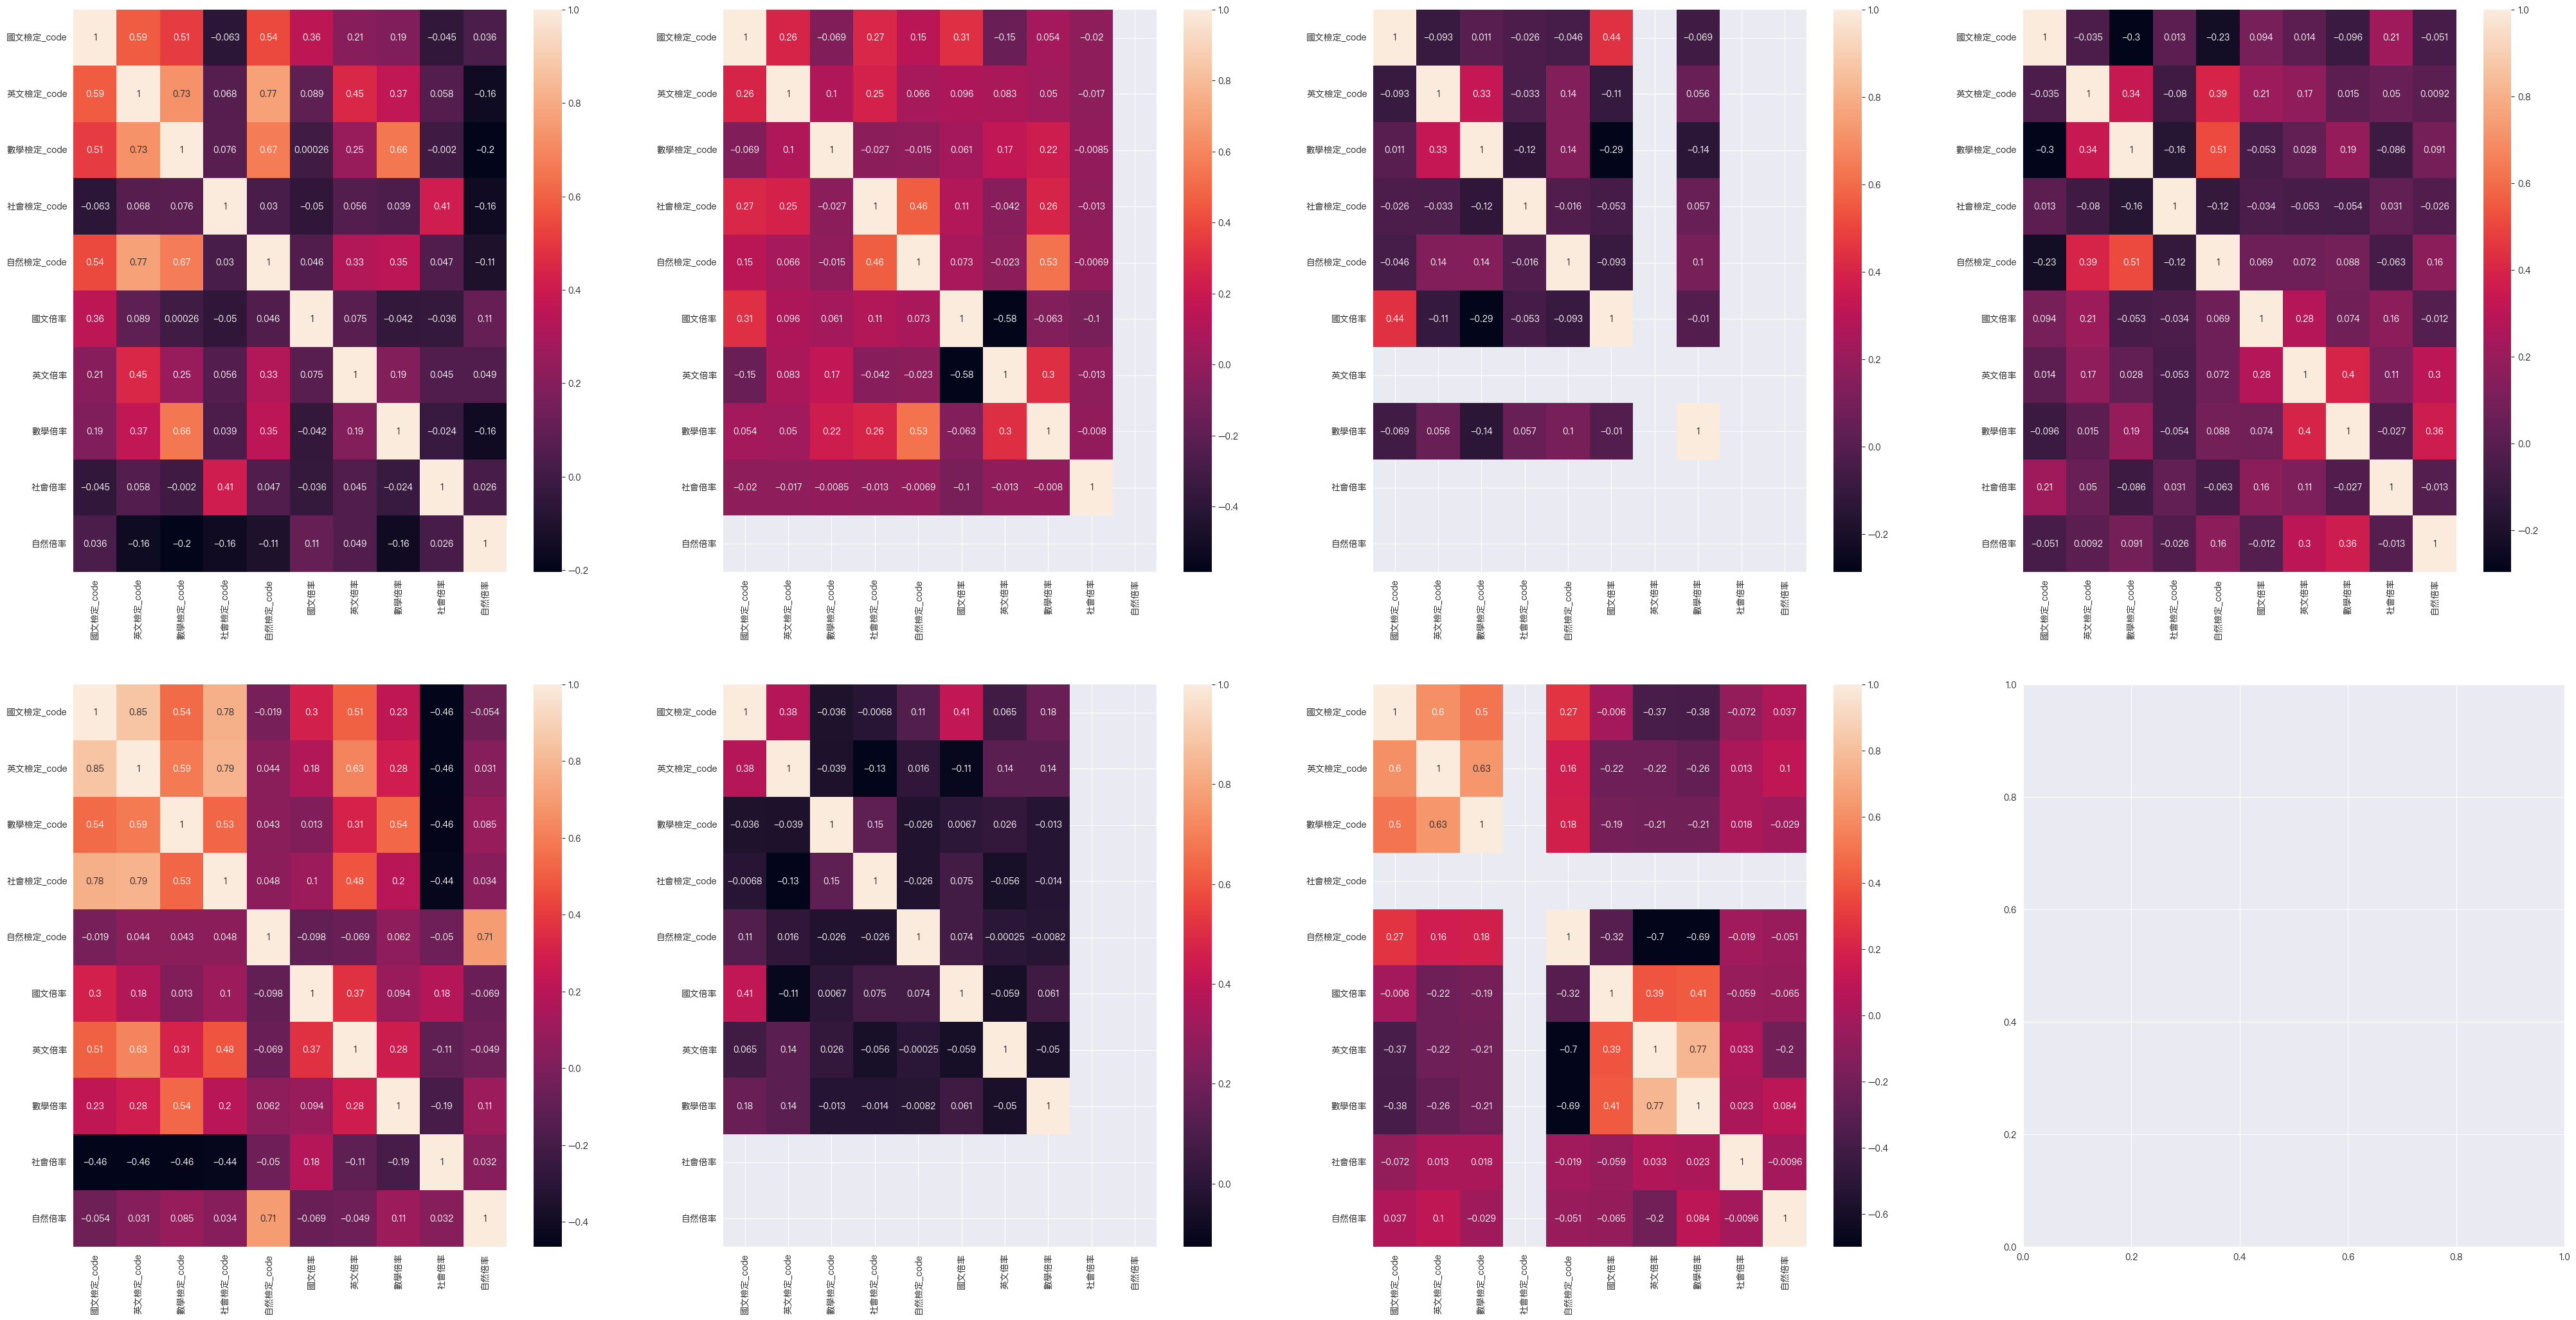

In [177]:
# show the correlation between columns
plt.subplots(2,4,figsize=(50,25))
for idx,df_ in enumerate(clustered_data.values()):
    plt.subplot(2,4,idx+1)
    sns.heatmap(df_[columnlist].corr() ,annot=True)
plt.show()  

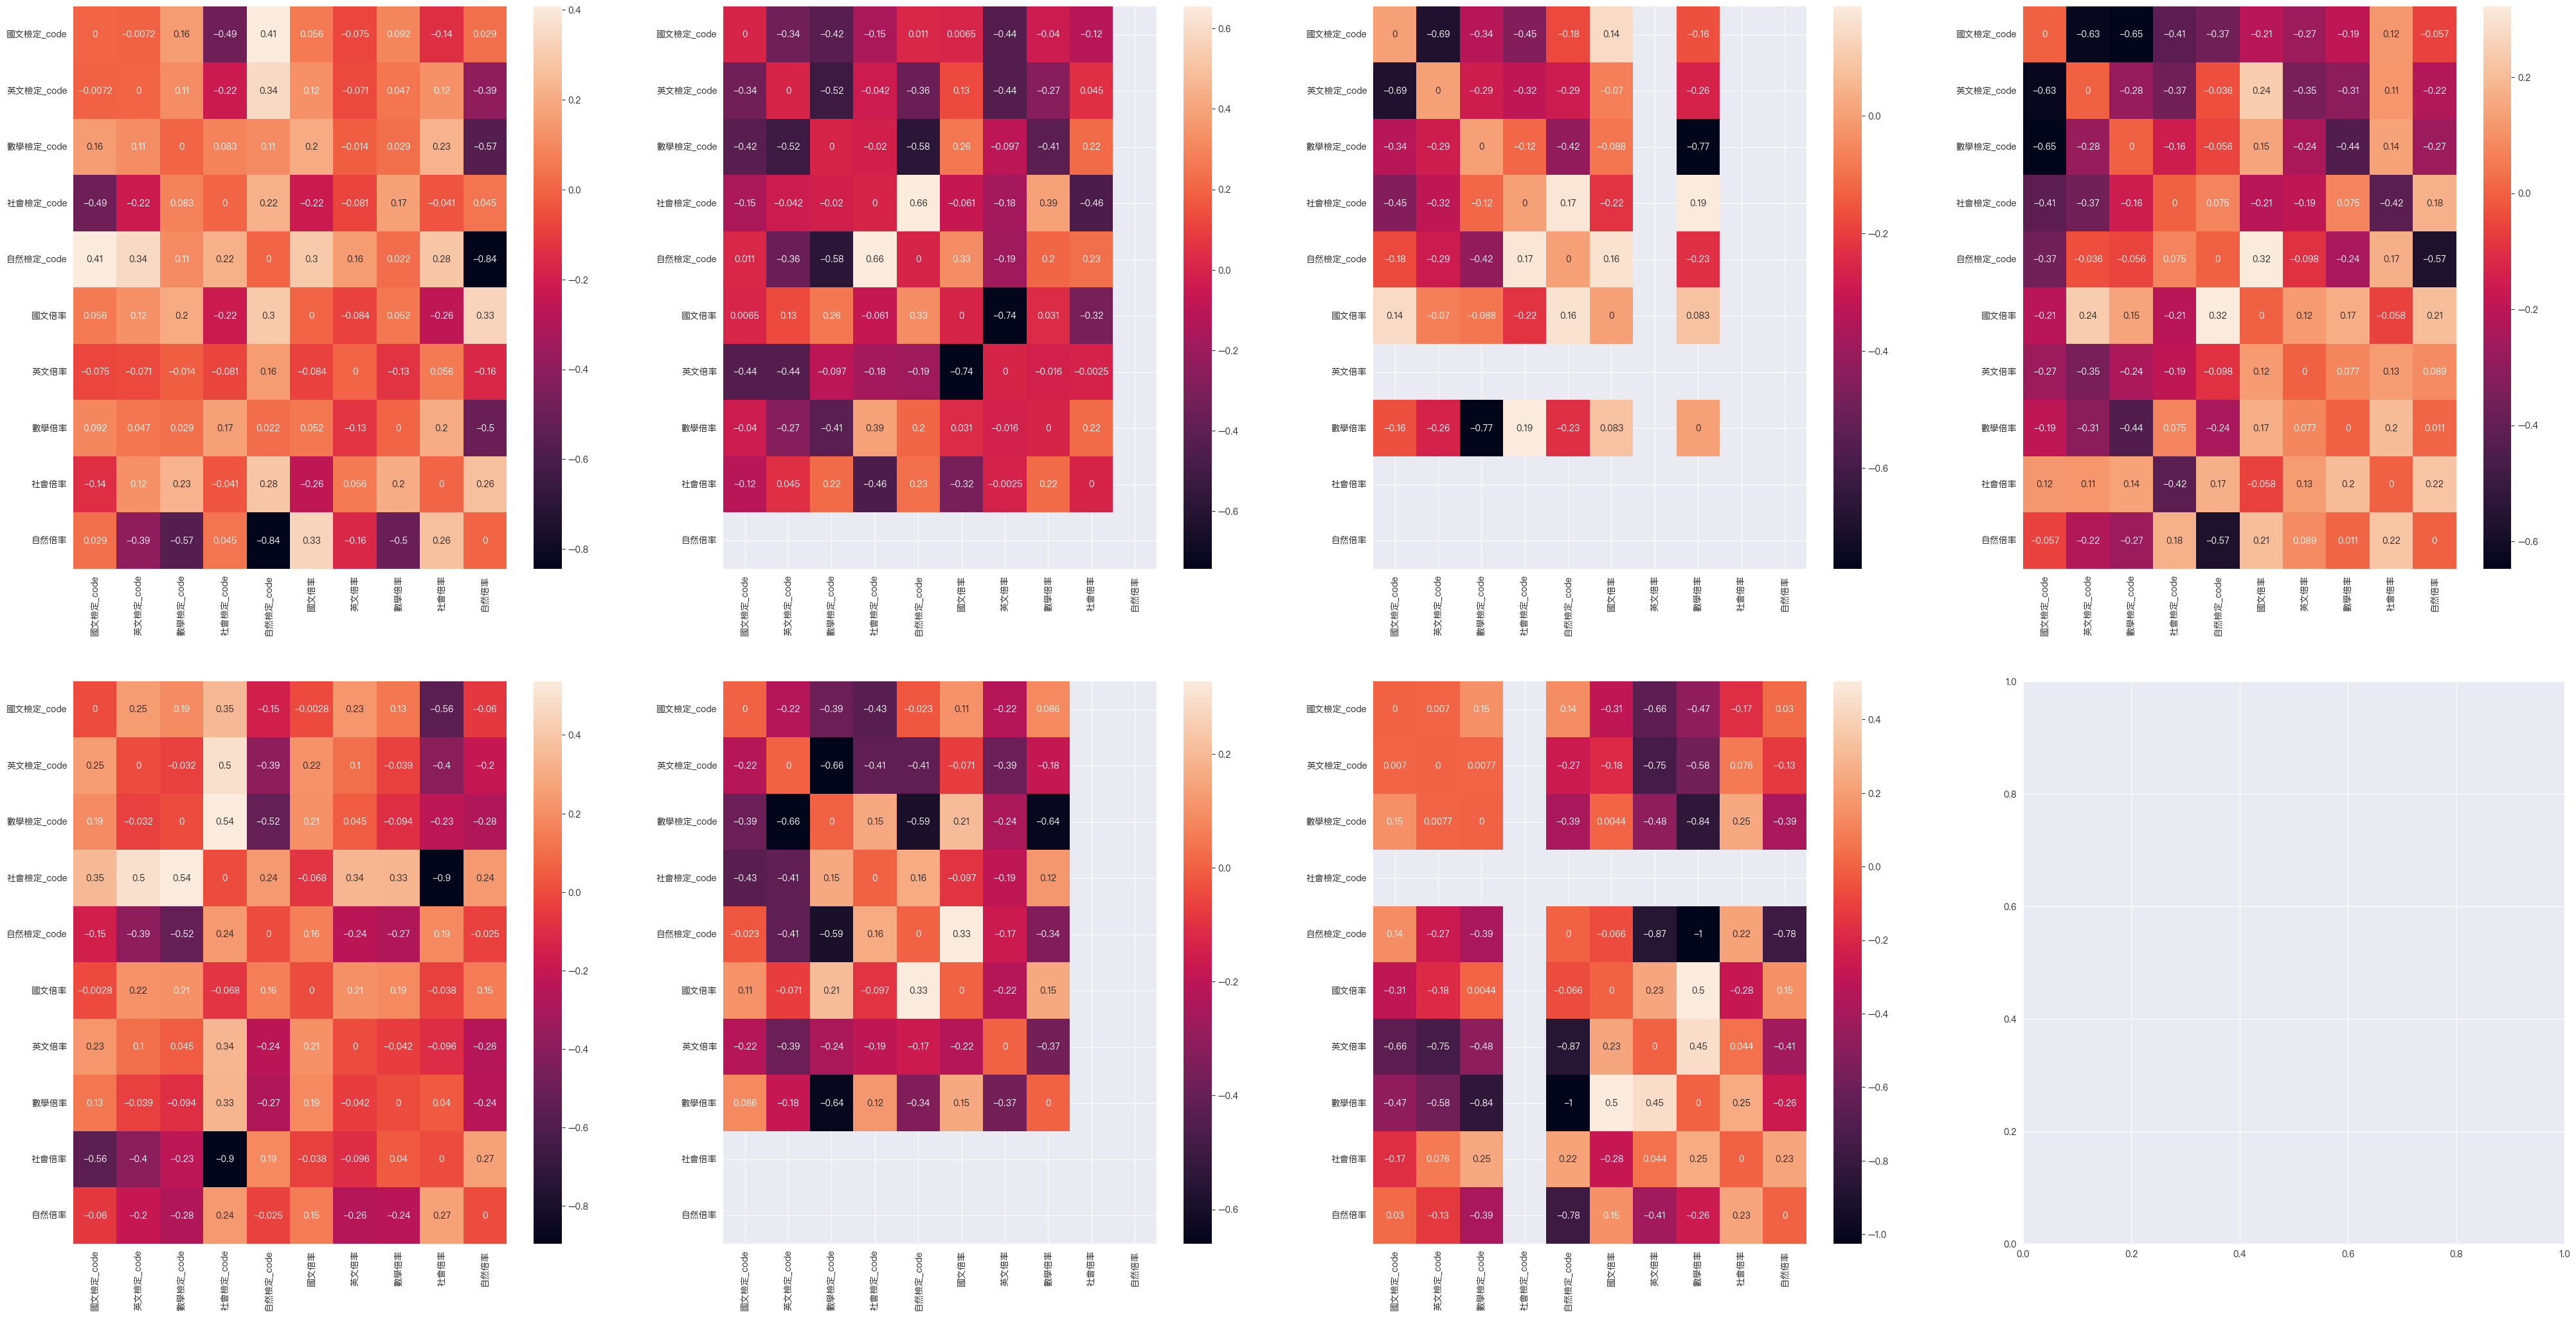

In [178]:
plt.subplots(2,4,figsize=(50,25))
for idx,df_ in enumerate(clustered_data.values()):
    plt.subplot(2,4,idx+1)
    sns.heatmap(df_[columnlist].corr().values - cleaned_df[columnlist].corr() ,annot=True)
plt.show()

<Axes: >

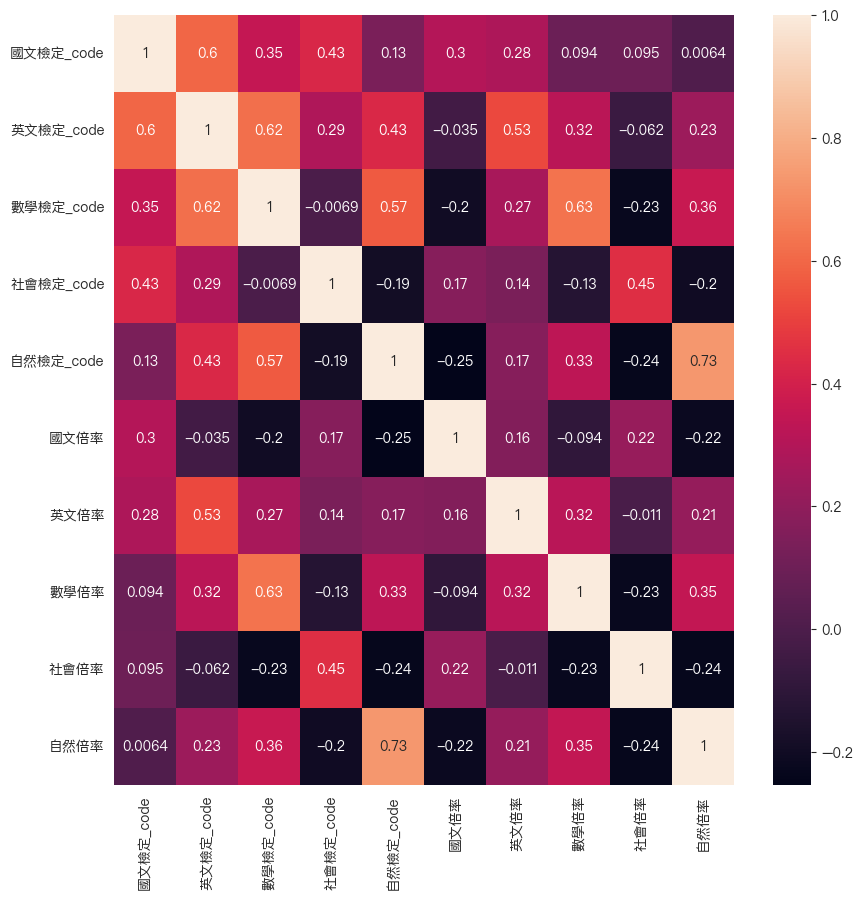

In [179]:
#base line corr
plt.subplots(1,1,figsize=(10,10))
sns.heatmap(cleaned_df[columnlist].corr(),annot=True)

In [180]:
cleaned_df.corr()

,國文檢定_code,英文檢定_code,數學檢定_code,社會檢定_code,自然檢定_code,國文倍率,英文倍率,數學倍率,社會倍率,自然倍率,預定甄試人數,甄試費用,口試佔比,書審佔比,unitier,cluster
國文檢定_code,1.000000,0.597245,0.350522,0.426614,0.134065,0.301066,0.284352,0.093574,0.095100,0.006400,-0.158968,0.299150,-0.119932,-0.097926,-0.064519,0.145346
英文檢定_code,0.597245,1.000000,0.621233,0.287976,0.429995,-0.034725,0.525061,0.319976,-0.062407,0.231737,-0.146963,0.415498,-0.253989,-0.076273,-0.102936,0.080706
數學檢定_code,0.350522,0.621233,1.000000,-0.006862,0.567919,-0.198997,0.267047,0.630843,-0.228226,0.361962,-0.110791,0.313792,-0.268799,0.027130,-0.074280,-0.127020
社會檢定_code,0.426614,0.287976,-0.006862,1.000000,-0.190522,0.171716,0.137456,-0.129045,0.451033,-0.201425,-0.121765,0.179627,-0.005197,-0.089564,0.008649,0.186442
自然檢定_code,0.134065,0.429995,0.567919,-0.190522,1.000000,-0.253375,0.169802,0.331454,-0.236777,0.731772,-0.067120,0.210381,-0.220880,0.027185,-0.093651,-0.567273
國文倍率,0.301066,-0.034725,-0.198997,0.171716,-0.253375,1.000000,0.159357,-0.093633,0.221201,-0.216986,-0.018595,-0.032887,0.160522,-0.101492,0.038517,0.122555
英文倍率,0.284352,0.525061,0.267047,0.137456,0.169802,0.159357,1.000000,0.319229,-0.010900,0.212150,-0.032823,0.264142,-0.124767,-0.165294,-0.047603,0.242519
數學倍率,0.093574,0.319976,0.630843,-0.129045,0.331454,-0.093633,0.319229,1.000000,-0.227349,0.347597,-0.008620,0.187783,-0.201816,-0.007686,-0.012239,-0.112616
社會倍率,0.095100,-0.062407,-0.228226,0.451033,-0.236777,0.221201,-0.010900,-0.227349,1.000000,-0.236140,-0.063733,-0.046498,0.150281,-0.052586,0.043645,0.245221
自然倍率,0.006400,0.231737,0.361962,-0.201425,0.731772,-0.216986,0.212150,0.347597,-0.236140,1.000000,-0.026562,0.128880,-0.187676,0.007416,-0.076128,-0.711596


# Use PCA to each cluster

In [181]:
from sklearn.decomposition import PCA

In [182]:
for idx,df_ in enumerate(clustered_data.values()):
    pca = PCA(n_components=2)
    X = df_[columnlist]
    pca.fit(X)
    print(f'group {list(clustered_data.keys())[idx]}')
    print(pca.components_)
    print('---------------------------------')

group 1
[[ 4.29193424e-01  5.41828149e-01  5.65933787e-01  4.33755049e-03
   4.21026454e-01  2.84156910e-02  8.81653001e-02  1.25764648e-01
   5.12353116e-04 -1.59543040e-02]
 [ 8.14836998e-01 -6.39770656e-02 -4.63150768e-01 -3.26552122e-02
  -6.36822655e-02  2.27468466e-01 -1.75725405e-02 -2.38227441e-01
  -3.99987756e-03  5.91452812e-02]]
---------------------------------
group 2
[[ 9.73007181e-01  1.49229036e-01 -1.00501358e-02  1.54440329e-01
   4.31625181e-02  6.46019692e-02 -2.91947672e-02  1.20561895e-02
  -8.92985838e-04  0.00000000e+00]
 [-2.17116415e-01  6.37340495e-01  3.28717613e-02  7.04167185e-01
   1.97152101e-01 -7.06272273e-03  4.91183570e-02  9.16146970e-02
  -9.37878368e-04 -0.00000000e+00]]
---------------------------------
group 3
[[-0.02673945  0.38060521  0.90367597 -0.0060265   0.0347135  -0.19111063
  -0.         -0.00545858 -0.         -0.        ]
 [-0.07219834  0.92087409 -0.37162563  0.00300566  0.02019268  0.09003698
   0.          0.01221723  0.          

# Find the rank inside the cluster will effect the competition in the cluster 
## 1. Find the main first stage sieve in each cluster
## 2. compute the correlation between the main sieve rank and the inside/outside competition 


In [192]:
# find the main sieve
for idx,df_ in enumerate(clustered_data.values()):
    print(f'group {idx+1}')
    for col in columnlist:
        print(f"{col} : {(df_[columnlist].mean() - cleaned_df[columnlist].mean()).abs()/(cleaned_df[columnlist].std())}")
        
mainsieves = dict()
for idx,df_ in enumerate(clustered_data.values()):
    mainsieves[idx+1] = ((df_[columnlist].mean() - cleaned_df[columnlist].mean()).abs()/(cleaned_df[columnlist].std())).nlargest(2).index.values

group 1
國文檢定_code : 國文檢定_code    0.001063
英文檢定_code    0.448508
數學檢定_code    0.707398
社會檢定_code    0.359907
自然檢定_code    1.373458
國文倍率         0.412433
英文倍率         0.386203
數學倍率         0.654962
社會倍率         0.433773
自然倍率         1.706964
dtype: float64
英文檢定_code : 國文檢定_code    0.001063
英文檢定_code    0.448508
數學檢定_code    0.707398
社會檢定_code    0.359907
自然檢定_code    1.373458
國文倍率         0.412433
英文倍率         0.386203
數學倍率         0.654962
社會倍率         0.433773
自然倍率         1.706964
dtype: float64
數學檢定_code : 國文檢定_code    0.001063
英文檢定_code    0.448508
數學檢定_code    0.707398
社會檢定_code    0.359907
自然檢定_code    1.373458
國文倍率         0.412433
英文倍率         0.386203
數學倍率         0.654962
社會倍率         0.433773
自然倍率         1.706964
dtype: float64
社會檢定_code : 國文檢定_code    0.001063
英文檢定_code    0.448508
數學檢定_code    0.707398
社會檢定_code    0.359907
自然檢定_code    1.373458
國文倍率         0.412433
英文倍率         0.386203
數學倍率         0.654962
社會倍率         0.433773
自然倍率         1.706964
dtype: float64
自然檢定

In [193]:
mainsieves

{1: array(['自然倍率', '自然檢定_code'], dtype=object),
 2: array(['國文倍率', '英文倍率'], dtype=object),
 3: array(['數學倍率', '英文倍率'], dtype=object),
 4: array(['英文倍率', '國文倍率'], dtype=object),
 5: array(['社會倍率', '社會檢定_code'], dtype=object),
 6: array(['英文倍率', '數學倍率'], dtype=object),
 7: array(['數學倍率', '數學檢定_code'], dtype=object)}

In [194]:
# generate the rank of the main sieves
#rankdf = pd.read_csv(f"./analyzeCodes/tempdata/{'simplify' if USE_SIMPLE_DATA else 'raw'}_in_out_cluster")
rankdf = pd.read_csv("/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/tempdata/raw_in_out_cluster.csv")
rankdf[sieve2] = -rankdf[sieve2]
clustered_rank_df = dict()
for idx in range(1,8):
    clustered_rank_df[idx] = rankdf[rankdf['cluster'] == idx]
    clustered_rank_df[idx] = clustered_rank_df[idx][['學系代碼',mainsieves[idx][0],mainsieves[idx][1]]]
    for col in mainsieves[idx]:
        clustered_rank_df[idx][col] = clustered_rank_df[idx][col].rank(pct= True)

rankdf['sieve1_rank'] = 0
rankdf['sieve2_rank'] = 0
sieve1rank = []
sieve2rank = []
for id,row in rankdf.iterrows():
    idx = row['cluster']
    sieve1rank.append(clustered_rank_df[idx][clustered_rank_df[idx]['學系代碼'] == row['學系代碼']][mainsieves[idx][0]]._values[0])
    sieve2rank.append(clustered_rank_df[idx][clustered_rank_df[idx]['學系代碼'] == row['學系代碼']][mainsieves[idx][1]]._values[0])
    print(clustered_rank_df[idx][clustered_rank_df[idx]['學系代碼'] == row['學系代碼']][mainsieves[idx][1]].values,end = '\r')
rankdf['sieve1_rank'] = sieve1rank
rankdf['sieve2_rank'] = sieve2rank

       

0.47983871][0.5046729][0.37176471][0.82108317][0.69882353][0.82108317][0.5046729]

# do some regression to find the relationship between the rank and the competition

In [195]:
rankdf[sieve2] = -rankdf[sieve2]
rankdf.to_csv(f"./tempdata/{'simplify' if USE_SIMPLE_DATA else 'raw'}_in_out_cluster_with_sieve.csv")

In [203]:
rankdf[rankdf['cluster'] == 3].head()

,Unnamed: 0,國文檢定_code,英文檢定_code,數學檢定_code,社會檢定_code,自然檢定_code,國文倍率,英文倍率,數學倍率,社會倍率,...,unitier,預定甄試人數,甄試費用,口試佔比,書審佔比,cluster,incluster,outcluster,sieve1_rank,sieve2_rank
35,35,0,0,12,0,0,30.0,30.0,5.5,30.0,...,2,50,480,0.70,0.00,3,0.303279,0.696721,0.065421,0.504673
93,93,0,0,50,0,0,30.0,30.0,3.0,30.0,...,1,54,0,0.00,0.50,3,NaN,NaN,0.682243,0.504673
97,97,0,0,50,0,0,30.0,30.0,3.0,30.0,...,3,60,0,0.00,0.50,3,NaN,NaN,0.682243,0.504673
111,111,0,0,50,0,0,30.0,30.0,3.0,30.0,...,2,60,1000,0.30,0.20,3,0.166667,0.833333,0.682243,0.504673
193,193,12,0,0,0,0,15.0,30.0,6.0,30.0,...,2,48,550,0.45,0.25,3,0.078788,0.921212,0.042056,0.504673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,2040,0,0,50,0,0,30.0,30.0,5.0,30.0,...,2,84,1000,0.25,0.30,3,0.576208,0.423792,0.121495,0.504673
2045,2045,0,0,50,0,0,30.0,30.0,5.0,30.0,...,1,75,1000,0.30,0.20,3,0.372951,0.627049,0.121495,0.504673
2055,2055,0,25,50,0,0,30.0,30.0,3.0,30.0,...,2,75,800,0.40,0.30,3,0.112500,0.887500,0.682243,0.504673
2083,2083,0,0,25,0,0,30.0,30.0,3.0,30.0,...,2,69,800,0.00,0.50,3,0.104348,0.895652,0.682243,0.504673
